In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
benchmark=pd.read_csv("/run/media/ramizouari/INTENSO/MPG/benchmark_gnp_random_mpg.csv")

Text(0.5, 1.0, 'Generation Time as a function of number of nodes')

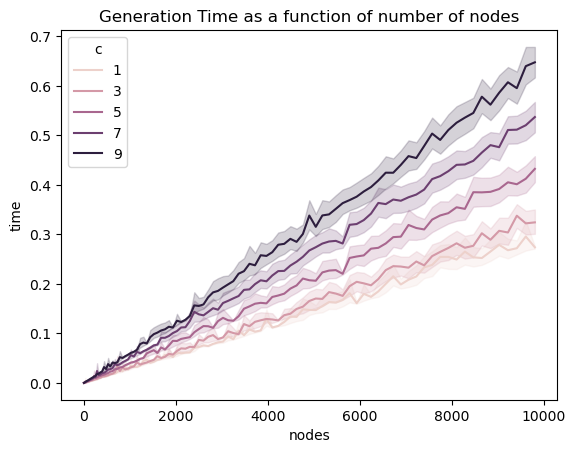

In [8]:
fig,ax=plt.subplots()
sns.lineplot(data=benchmark,x="nodes",y="time",hue="c",ax=ax)
ax.set_title("Generation Time as a function of number of nodes")

In [ ]:
fig,ax=plt.subplots()
sns.lineplot(data=benchmark,x="nodes",y="time",hue="c",ax=ax)
ax.set_title("Generation Time as a function of number of nodes")

<Axes: >

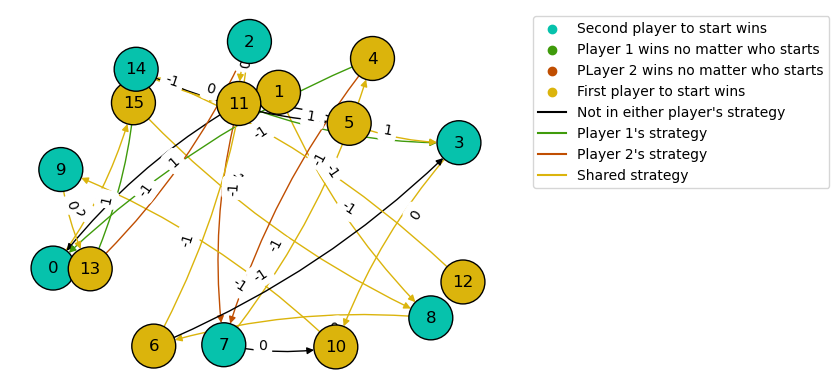

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import visualisation.game as vgame
import pickle
import games.mpg as mpg
import networkx as nx
graph=nx.read_weighted_edgelist("/run/media/ramizouari/INTENSO/MPG/dataset/test/gnp_uniform_mpg_16_1_0.edgelist.gz",create_using=mpg.MeanPayoffGraph,nodetype=int)
for e in graph.edges:
    for u in graph.edges[e]:
        graph.edges[e][u]=int(graph.edges[e][u])
fig,ax=plt.subplots()
visual_graph=vgame.MPGPlot(graph)
S1,S2=mpg.optimal_strategy_pair(graph)
visual_graph.set_node_color_mapping(vgame.WinnerVisualiser(graph,S1,S2))
visual_graph.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
visual_graph.plot(ax)

In [7]:
import os
import re
import numpy as np
base_dir="/run/media/ramizouari/INTENSO/MPG/"
directory="/run/media/ramizouari/INTENSO/MPG/dataset"
for file in os.listdir(directory):
    match=re.search(R"gnp_uniform_mpg_(\d+)_(\d+)_(\d+)(\.edgelist\.gz)",file)
    if match:
        n=int(match.group(1))
        extension=match.group(4)
    if n <=36:
        graph=nx.read_weighted_edgelist(os.path.join(directory,file),create_using=mpg.MeanPayoffGraph,nodetype=int)
        for e in graph.edges:
            for u in graph.edges[e]:
                graph.edges[e][u]=int(graph.edges[e][u])
        fig,ax=plt.subplots()
        visual_graph=vgame.MPGPlot(graph)
        S1,S2=mpg.optimal_strategy_pair(graph)
        visual_graph.set_node_color_mapping(vgame.WinnerVisualiser(graph,S1,S2))
        visual_graph.set_edge_color_mapping(vgame.StrategyVisualiser(S1,S2))
        visual_graph.plot(ax)
        fig.savefig(os.path.join(base_dir,"img",file.replace(match.group(4),".png")))
        plt.close(fig)

In [16]:
graph.edges[(0,1)]["weight"]

0.0

In [62]:
import os
from datetime import time,datetime,date
import timeit
import numpy as np
import pandas as pd
import re
dataset=[]
directory="/run/media/ramizouari/INTENSO/MPG/dataset/sparse"
file_template="gnp_uniform_mpg_{}_1_1"
for file in os.listdir(directory):
    match=re.search(R"gnp_uniform_mpg_(\d+)_(\d+)_(\d+)(\.edgelist\.gz)",file)
    if match:
        n=int(match.group(1))
        c=int(match.group(2))
        extension=match.group(4)
    else:
        continue
    if n>300 or c>1:
        continue
    row={}
    row["filename"]=file
    row["nodes"]=n
    row["n"]=n
    row["c"]=c
    graph=nx.read_weighted_edgelist(os.path.join(directory,file),create_using=mpg.MeanPayoffGraph,nodetype=int)
    for e in graph.edges:
                for u in graph.edges[e]:
                    graph.edges[e][u]=graph.edges[e][u]
    start=timeit.default_timer()
    mpg.optimal_strategy_pair(graph)
    end=timeit.default_timer()
    row["time"]=end-start
    dataset.append(row)
    
dataset=pd.DataFrame(dataset)

In [27]:
dataset.to_csv("execution_time.csv")

<Axes: xlabel='n', ylabel='maxtime'>

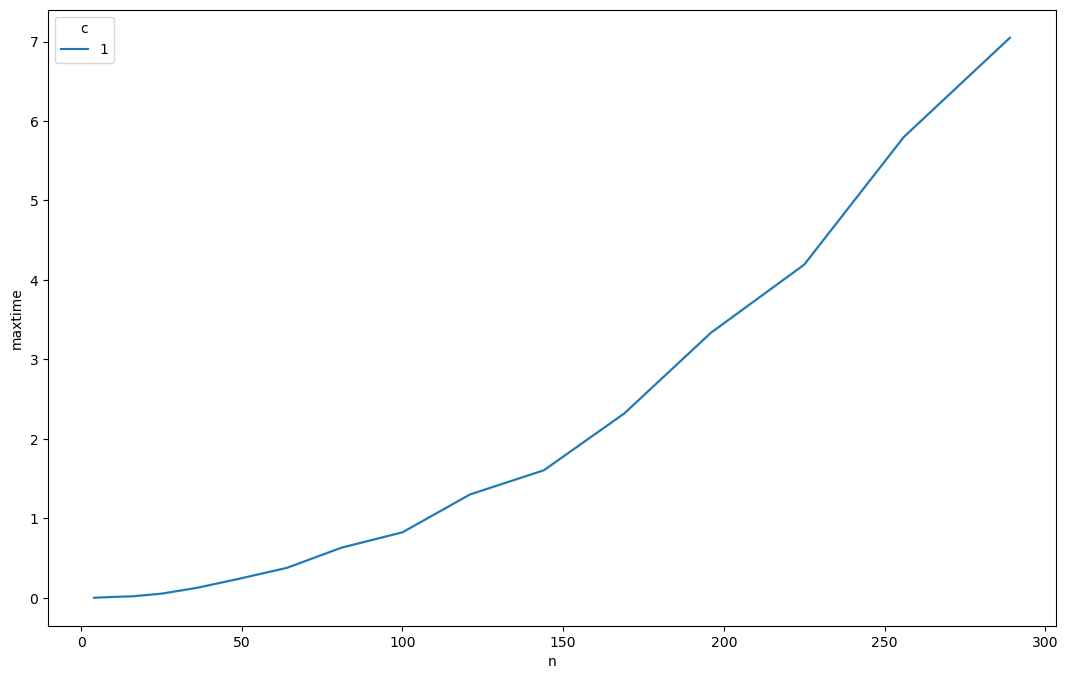

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax=plt.subplots(figsize=(13,8))
S=dataset.groupby(["n","c"]).max()["time"]
dataset["maxtime"]=[S[s["n"],s["c"]]  for s in dataset.iloc]
sns.lineplot(data=dataset,x="n",y="maxtime",hue="c")

In [58]:
list(dataset.iloc)[0]["n"]

4